In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.random.set_seed(777) #하이퍼파라미터 튜닝을 위해 실행시 마다 변수가 같은 초기값 가지게 하기
import numpy as np
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform

In [17]:
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

%matplotlib inline

In [18]:
def load_time_series_data(data, sequence_length):
    print(data.shape)
    print(sequence_length)
    window_length = sequence_length + 1
    x_data = []
    y_data = []
    for i in range(0, len(data) - window_length + 1): #0 1 2 3 4 5 6 7 8 9 | 10
        window = data[i:i + window_length, :]
        x_data.append(window[:-1, :])
        y_data.append(window[-1, [-1]])
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    print(x_data.shape)
    print(y_data.shape)

    return x_data, y_data

In [19]:
df = pd.read_pickle('./data/total_df.pkl')
df.head()

,일시,측정소명,풍향,풍속,온도,습도,강수량,PM
1,2021-01-01 01:00:00,강남,327.0,1.3,-7.0,55.0,0.0,13.0
2,2021-01-01 02:00:00,강남,309.0,1.1,-6.8,55.0,0.0,13.0
3,2021-01-01 03:00:00,강남,45.0,0.9,-7.0,57.0,0.0,12.0
4,2021-01-01 04:00:00,강남,304.0,0.6,-7.5,57.0,0.0,13.0
5,2021-01-01 05:00:00,강남,82.0,0.8,-7.7,60.0,0.0,14.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529471 entries, 1 to 529583
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   일시      529471 non-null  object 
 1   측정소명    529471 non-null  object 
 2   풍향      529471 non-null  float64
 3   풍속      529471 non-null  float64
 4   온도      529471 non-null  float64
 5   습도      529471 non-null  float64
 6   강수량     529471 non-null  float64
 7   PM      529471 non-null  float64
dtypes: float64(6), object(2)
memory usage: 36.4+ MB


In [21]:
df.describe()

,풍향,풍속,온도,습도,강수량,PM
count,529471.000000,529471.000000,529471.000000,529471.000000,529471.000000,529471.000000
mean,177.875201,1.385832,14.534760,59.420580,0.173498,19.301530
std,103.656219,0.745729,10.949943,20.781416,1.336110,15.785482
min,0.000000,0.000000,-32.900000,0.000000,0.000000,1.000000
25%,91.000000,0.873030,6.200000,44.000000,0.000000,9.000000
50%,173.000000,1.300000,16.000000,59.000000,0.000000,15.000000
75%,268.000000,1.800000,23.700000,76.000000,0.000000,25.000000
max,360.000000,8.100000,38.300000,100.000000,92.500000,237.000000


In [22]:
##########데이터 전처리

df = df[df['측정소명'] == '강남']


data = df[['PM']].to_numpy()
print(data.shape) #((720, 1)

(24071, 1)


In [23]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data

array([[0.08695652],
       [0.08695652],
       [0.07971014],
       ...,
       [0.15942029],
       [0.14492754],
       [0.0942029 ]])

In [24]:
sequence_length = 3
x_data, y_data = load_time_series_data(data, sequence_length)
x_data = x_data.reshape(len(x_data), -1)

x_data.shape, y_data.shape

(24071, 1)
7
(24064, 7, 1)
(24064, 1)


((24064, 7), (24064, 1))

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, shuffle=False) #시각화를 위해 shuffle=False 옵션 사용

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16844, 7), (16844, 1), (7220, 7), (7220, 1))

In [31]:
##########모델 생성

input = tf.keras.layers.Input(shape=(sequence_length,))
net = tf.keras.layers.Dense(units=32, activation='relu')(input)
net = tf.keras.layers.Dense(units=32, activation='relu')(net)
net = tf.keras.layers.Dense(units=1)(net)
model = tf.keras.models.Model(input, net)


model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_6 (Dense)             (None, 32)                256       
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test)) 

Epoch 1/50
527/527 [==============================] - 2s 4ms/step - loss: 9.6637e-04 - val_loss: 6.2867e-04
Epoch 2/50
527/527 [==============================] - 2s 4ms/step - loss: 6.9508e-04 - val_loss: 6.0089e-04
Epoch 3/50
527/527 [==============================] - 2s 4ms/step - loss: 6.8885e-04 - val_loss: 7.0718e-04
Epoch 4/50
527/527 [==============================] - 2s 4ms/step - loss: 6.7189e-04 - val_loss: 6.5507e-04
Epoch 5/50
527/527 [==============================] - 2s 4ms/step - loss: 6.7290e-04 - val_loss: 5.9568e-04
Epoch 6/50
527/527 [==============================] - 2s 4ms/step - loss: 6.5968e-04 - val_loss: 7.7409e-04
Epoch 7/50
527/527 [==============================] - 2s 4ms/step - loss: 6.6980e-04 - val_loss: 6.0051e-04
Epoch 8/50
527/527 [==============================] - 2s 4ms/step - loss: 6.7555e-04 - val_loss: 5.8408e-04
Epoch 9/50
527/527 [==============================] - 2s 4ms/step - loss: 6.5723e-04 - val_loss: 6.5965e-04
Epoch 10/50
527/527 [=======

In [28]:
def plot(data, y_predict_train, y_predict_test):
    plt.plot(scaler.inverse_transform(data)[:, [-1]].flatten(), label='실제 PM2.5')

    y_predict_train = scaler.inverse_transform(y_predict_train)
    y_predict_train_plot = np.empty_like(data[:, [0]])
    y_predict_train_plot[:, :] = np.nan
    y_predict_train_plot[sequence_length:len(y_predict_train) + sequence_length, :] = y_predict_train
    plt.plot(y_predict_train_plot.flatten(), label='예측 PM2.5')

    y_predict_test = scaler.inverse_transform(y_predict_test)
    y_predict_test_plot = np.empty_like(data[:, [0]])
    y_predict_test_plot[:, :] = np.nan
    y_predict_test_plot[len(y_predict_train) + sequence_length:, :] = y_predict_test
    plt.plot(y_predict_test_plot.flatten(), label='테스트 데이터 예측 PM2.5')

    plt.legend()
    plt.show()

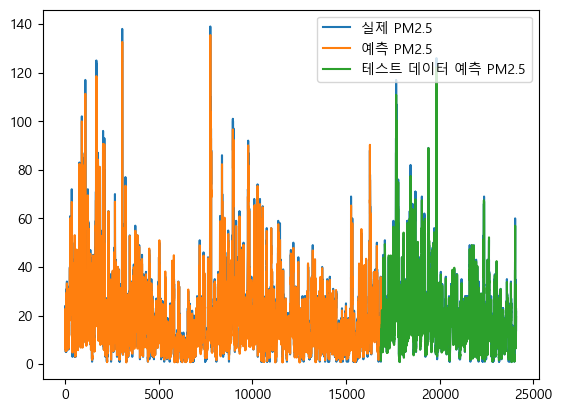

In [29]:
y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)
plot(data, y_predict_train, y_predict_test)

In [30]:
x_test = np.array([
        [44, 49, 50]
])
x_test = x_test.reshape(-1, 1)
x_test = scaler.transform(x_test)
x_test = x_test.reshape(1, sequence_length)

y_predict = model.predict(x_test)

y_predict = scaler.inverse_transform(y_predict)
print(y_predict[0][0])

ValueError: cannot reshape array of size 3 into shape (1,7)